EDA creation 

uploading the required library to the notebook

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [20]:
Liver_dataset=pd.read_csv("indian_liver_patient_NEW.csv")
Liver_dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


To check the datasize and  features of the dataset

In [3]:
print(Liver_dataset.shape)
Liver_dataset.columns

(583, 11)


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [4]:
Liver_dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

So Albumin_and_Globulin_Ratio  has only 4 missing values so that's not a problem to our module because it's very less number


In [5]:
Liver_dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Albumin_and_Globulin_Ratio the min is 0.3 and max is 2.8 so those are very close.so replace the null values to mean  

In [6]:
Liver_dataset["Albumin_and_Globulin_Ratio"] = Liver_dataset.Albumin_and_Globulin_Ratio.fillna(Liver_dataset['Albumin_and_Globulin_Ratio'].mean())

<AxesSubplot:xlabel='Dataset', ylabel='count'>

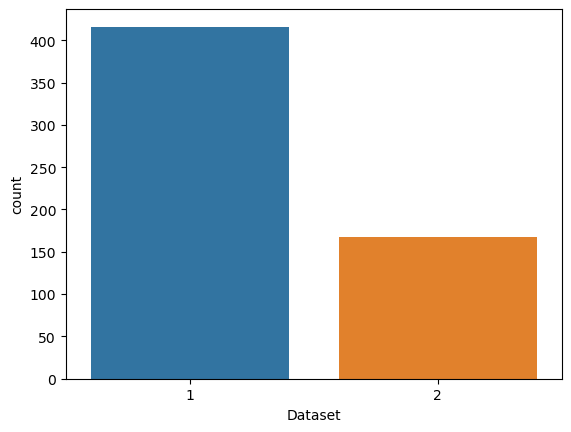

In [12]:
sns.countplot(x='Dataset', data=Liver_dataset)

So observing the above plot more data is lie in the set1. next we observe  which gender has more 

<AxesSubplot:xlabel='Gender', ylabel='count'>

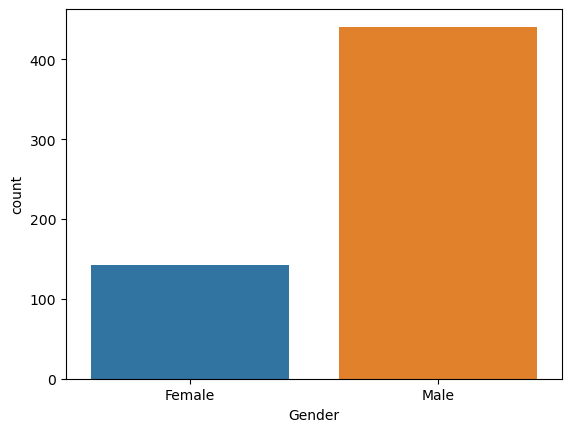

In [13]:
sns.countplot(data=Liver_dataset, x = 'Gender')


comparing the male and females more males get desieas

know we see the relation ship for each feature

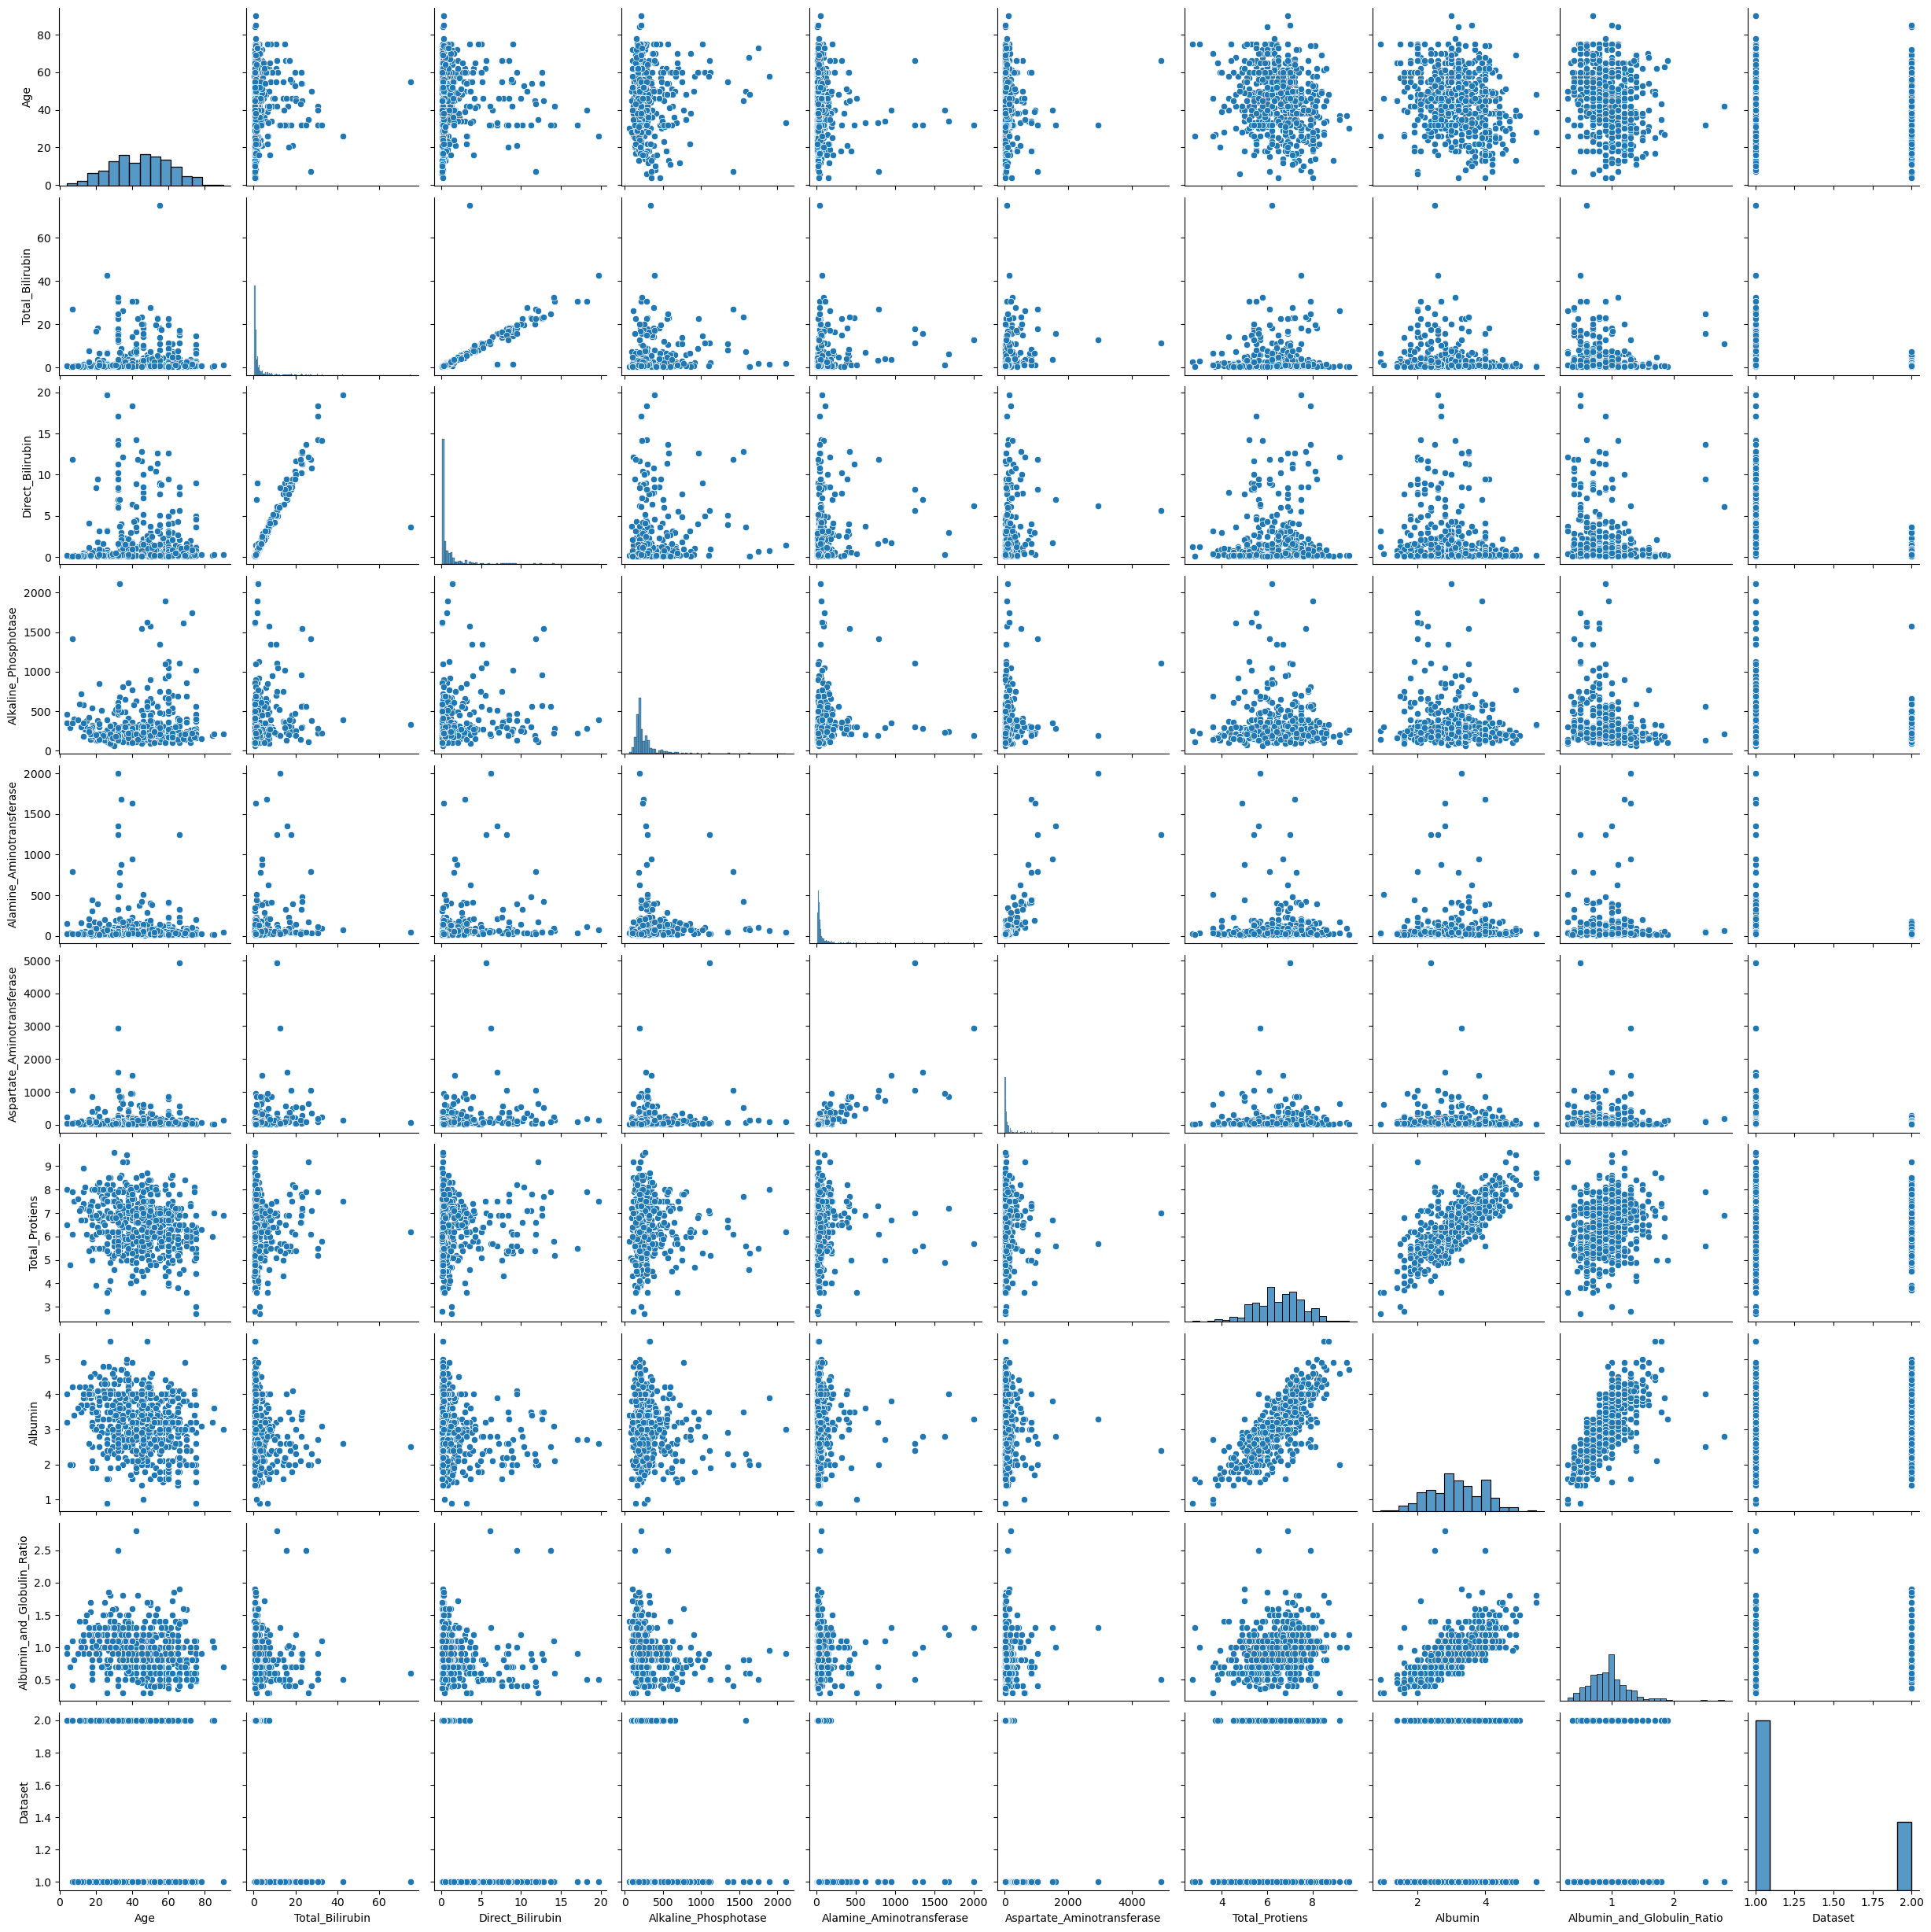

In [14]:
sns.pairplot(Liver_dataset)

but these is not clear  so we will check the corelation table

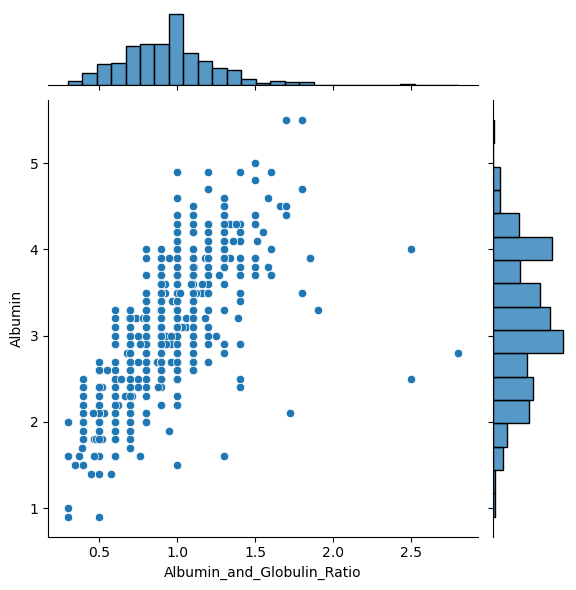

In [32]:
sns.jointplot(data = Liver_dataset,x="Albumin_and_Globulin_Ratio",y = "Albumin")


sns.jointplot(data = Liver_dataset,x="Direct_Bilirubin",y = "Alkaline_Phosphotase")


In [21]:
Liver_dataset['Dataset'] = np.where(Liver_dataset['Dataset'] == 2,0,1)

In [26]:
Liver_dataset = pd.get_dummies(Liver_dataset,drop_first = True)
Liver_dataset.head()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


<AxesSubplot:>

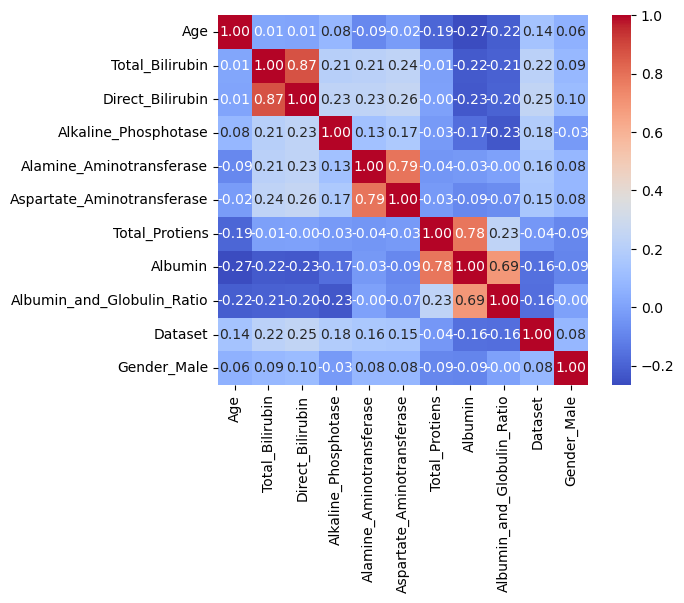

In [31]:
sns.heatmap(Liver_dataset.corr(), cbar = True,  square = True,annot=True,fmt= '.2f',annot_kws={'size': 10},cmap= 'coolwarm')

so in these 
Total_Bilirubin---Direct_Bilirubin
Alamine_Aminotransferase	---Aspartate_Aminotransferase 
Total_Protiens----Albumin
Albumin---Albumin_and_Globulin_Ratio has relationship is more so take theses values for features for building a modle

THAnk You.